## PythonでのRunge-Kuttaの実装と速度計測


### 4次のRunge-Kuttaの復習

以下の常微分方程式
\begin{aligned}
  \frac{dy(t)}{dt} = f(t,y)
\end{aligned}
を数値的に解きたいとする。

初期条件$y(t_0)=y_0$と時間刻み幅$\Delta t$を用いて、数値的に積分したい。

4次のRunge-kuttaでは以下の更新式を用いて数値積分する。

\begin{aligned}
  y_{n+1}=y_{n}+\frac{\Delta t}{6}\left(k_{1}+2 k_{2}+2 k_{3} + k_{4}\right)
\end{aligned}

ここで、$k_1, k_2, k_3, k_4$は、

\begin{aligned}
  k_{1} &=f\left(t_{n}, y_{n}\right) \\ 
  k_{2} &=f\left(t_{n}+\frac{\Delta t}{2}, y_{n}+\frac{\Delta t}{2} k_{1}\right) \\ 
  k_{3} &=f\left(t_{n}+\frac{\Delta t}{2}, y_{n}+\frac{\Delta t}{2} k_{2}\right) \\ 
  k_{4} &=f\left(t_{n} + \Delta t, y_{n} + \Delta t k_{3}\right) 
\end{aligned}

この積分は4次精度$O(\Delta t^4)$の近似になっている。


### PythonでのRunge-Kuttaの実装

Runge-Kuttaを使って一般的に常微分方程式を解くソルバーを実装する。


In [23]:
import numpy as np
y = np.array([[1, 2, 3], [4, 5, 6]])

In [24]:
y[:, 0]

array([1, 4])

In [25]:
def rungekutta(f, y, time):
    delta_t = time[1] - time[0]
    for n in range(1, len(time)):
        k1 = delta_t * f(time[n-1], y[:, n-1])
        k2 = delta_t * f(time[n-1] + 0.5 * delta_t, y[:, n-1] + 0.5 * k1)
        k3 = delta_t * f(time[n-1] + 0.5 * delta_t, y[:, n-1] + 0.5 * k2)
        k4 = delta_t * f(time[n-1] + delta_t, y[:, n-1] + k3)
        y[:, n] = y[:, n-1] + (1.0 / 6.0) * (k1 + 2.0*k2 + 2.0*k3 + k4)
    return y


### Lorenzアトラクタでの例

\begin{align}
  {\frac{d x}{d t}=-p x+p y} \\
  {\frac{d y}{d t}=-x z+r x-y} \\
  {\frac{d z}{d t}=x y-b z}
\end{align}

ここで、$p=10$、$r=28$、$b=8/3$。

In [26]:
np.zeros(3)

array([0., 0., 0.])

In [27]:
import numpy as np

def f_lorenz(t, y):
    p = 10.0
    r = 28.0
    b = 8.0 / 3.0
    dydx = np.zeros(3);
    dydx[0] = - p*y[0] + p*y[1]
    dydx[1] = - y[0]*y[2] + r*y[0] - y[1]
    dydx[2] = y[0]*y[1] - b*y[2]
    return dydx


In [28]:
import numpy as np

delta_t = 0.01
nstep = 10000
time = [n*delta_t for n in range(nstep+1)]
y = np.zeros((3, len(time)))
y[:, 0] = 1.0

In [29]:
y2 = rungekutta(f_lorenz, y, time)

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

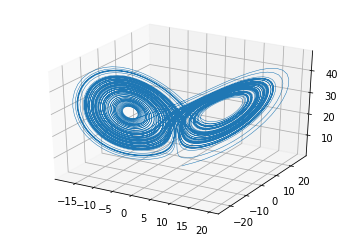

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(y2[0, :], y2[1, :], y2[2, :], lw=0.5)

#plt.plot(y2[0, :], y2[1, :])

### 実行時間の計測
%timeitを使うと、何回か実行してそれの統計を出力してくれる
使い方は
```
%%timeit Pythonの式
```

%%timeitはセル全体を計測してくれる

In [37]:
%timeit y2 = rungekutta(f_lorenz, y, time)

234 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%timeit

y2 = rungekutta(f_lorenz, y, time)

247 ms ± 8.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
